In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings("ignore") # hide warnings

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
%matplotlib inline
from datetime import datetime

In [4]:
df = pd.read_csv("15mindataCSV.csv")
print("="*50)
print("First Five Rows ","\n")
print(df.head(5),"\n")

print("="*50)
print("Information About Dataset","\n")
print(df.info(),"\n")

print("="*50)
print("Describe the Dataset ","\n")
print(df.describe(),"\n")

print("="*50)
print("Null Values t ","\n")
print(df.isnull().sum(),"\n")

First Five Rows  

              Time  Flowrate (l/min)
0  2022-01-01 0:00               0.0
1  2022-01-01 0:15               0.0
2  2022-01-01 0:30               0.0
3  2022-01-01 0:45               0.0
4  2022-01-01 1:00               0.0 

Information About Dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Time              35040 non-null  object 
 1   Flowrate (l/min)  35040 non-null  float64
dtypes: float64(1), object(1)
memory usage: 547.6+ KB
None 

Describe the Dataset  

       Flowrate (l/min)
count      35040.000000
mean           3.125000
std            9.793984
min            0.000000
25%            0.000000
50%            0.000000
75%            2.200000
max          214.800000 

Null Values t  

Time                0
Flowrate (l/min)    0
dtype: int64 



In [5]:
# Extract all Data Like Year MOnth Day Time etc
dataset = df
dataset["Month"] = pd.to_datetime(df["Time"]).dt.month
dataset["Year"] = pd.to_datetime(df["Time"]).dt.year
dataset["Date"] = pd.to_datetime(df["Time"]).dt.date
dataset["Hour"] = pd.to_datetime(df["Time"]).dt.time
dataset["Week"] = pd.to_datetime(df["Time"]).dt.week
dataset["Day"] = pd.to_datetime(df["Time"]).dt.day_name()
dataset = df.set_index("Time")
dataset.index = pd.to_datetime(dataset.index)
#dataset["Time"] = pd.to_datetime(df["Time"]).dt.strftime("%Y %m %d %H %M")
print(dataset.head(-10))
print(df.info(),"\n")

                     Flowrate (l/min)  Month  Year        Date      Hour  \
Time                                                                       
2022-01-01 00:00:00               0.0      1  2022  2022-01-01  00:00:00   
2022-01-01 00:15:00               0.0      1  2022  2022-01-01  00:15:00   
2022-01-01 00:30:00               0.0      1  2022  2022-01-01  00:30:00   
2022-01-01 00:45:00               0.0      1  2022  2022-01-01  00:45:00   
2022-01-01 01:00:00               0.0      1  2022  2022-01-01  01:00:00   
...                               ...    ...   ...         ...       ...   
2022-12-31 20:15:00               0.0     12  2022  2022-12-31  20:15:00   
2022-12-31 20:30:00               3.6     12  2022  2022-12-31  20:30:00   
2022-12-31 20:45:00               0.0     12  2022  2022-12-31  20:45:00   
2022-12-31 21:00:00               5.8     12  2022  2022-12-31  21:00:00   
2022-12-31 21:15:00              11.4     12  2022  2022-12-31  21:15:00   

           

Text(0.5, 1.0, 'January DHW demand')

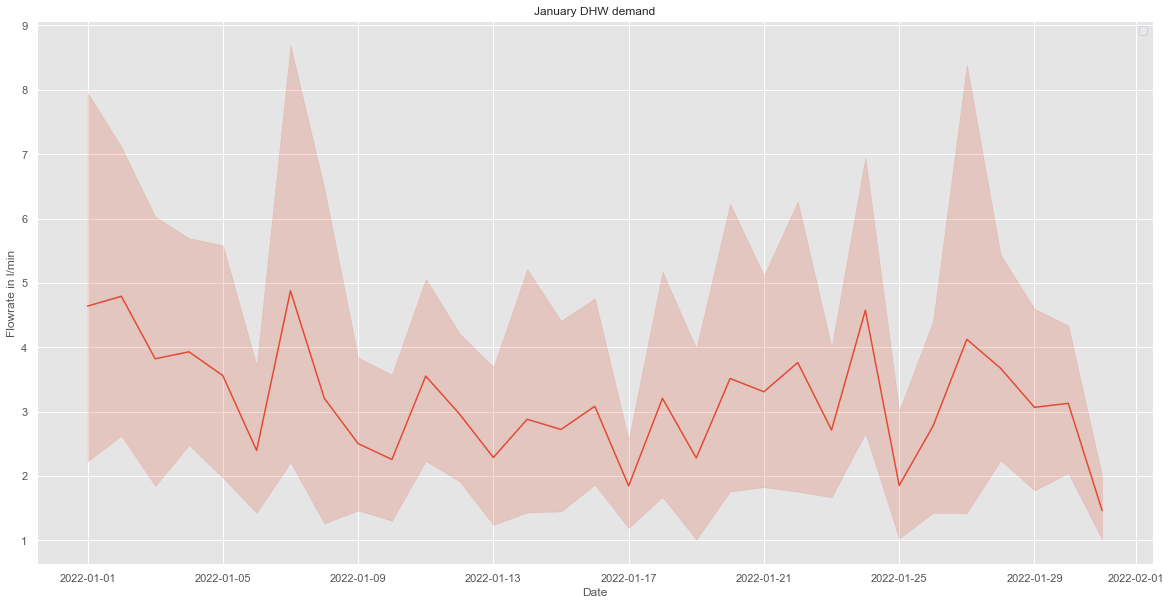

In [26]:
#Data Visualizations
from matplotlib import style

fig = plt.figure()
ax1 = plt.subplot2grid((1,1), (0,0))

style.use('ggplot')

january=df.query("Month == 1")

sns.lineplot(data=january, x=january["Date"], y=january["Flowrate (l/min)"])
sns.set(rc={'figure.figsize':(10,5)})

plt.title("DHW demand")
plt.xlabel("Date")
plt.ylabel("Flowrate in l/min")
plt.grid(True)
plt.legend()

#for label in ax1.xaxis.get_ticklabels():
   # label.set_rotation(90)


plt.title("January DHW demand")


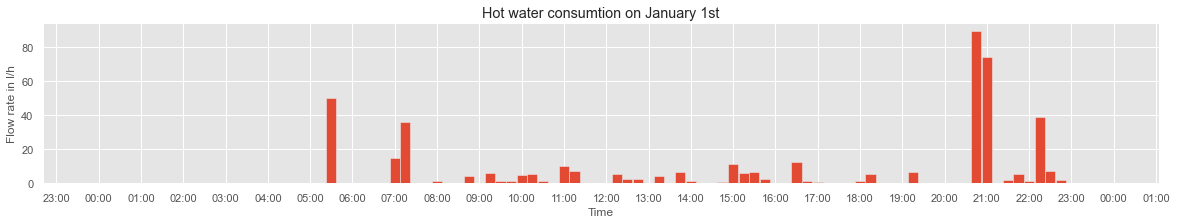

In [22]:
from matplotlib import style
import matplotlib.dates as md

fig = plt.figure()

ax1= fig.add_subplot(311)


style.use('ggplot')

January  = dataset.iloc[:,0:1]
January = January.loc['20220101':'20220101']

#plt.plot(January.index,January["Flowrate (l/min)"],  linewidth=2)
plt.bar(January.index,January["Flowrate (l/min)"],width=0.01)

plt.rcParams["figure.figsize"] = (20,10)
plt.title("Hot water consumtion on January 1st")
plt.xlabel("Time")
plt.ylabel("Flow rate in l/h")
plt.grid(True, alpha=1)
ax1.xaxis.set_major_locator(md.MinuteLocator(byminute = [0, 120]))
ax1.xaxis.set_major_formatter(md.DateFormatter('%H:%M'))

#for label in ax1.xaxis.get_ticklabels():
    #label.set_rotation(90)



In [9]:
NewDataSet = dataset.resample('900s').mean()
print("Old Dataset ",dataset.shape )
print("New  Dataset ",NewDataSet.shape)
NewDataSet

#TestData,Training_Set,Training_Set

Old Dataset  (35040, 7)
New  Dataset  (35040, 4)


,Flowrate (l/min),Month,Year,Week
Time,,,,
2022-01-01 00:00:00,0.0,1.0,2022.0,52.0
2022-01-01 00:15:00,0.0,1.0,2022.0,52.0
2022-01-01 00:30:00,0.0,1.0,2022.0,52.0
2022-01-01 00:45:00,0.0,1.0,2022.0,52.0
2022-01-01 01:00:00,0.0,1.0,2022.0,52.0
...,...,...,...,...
2022-12-31 22:45:00,0.0,12.0,2022.0,52.0
2022-12-31 23:00:00,0.0,12.0,2022.0,52.0
2022-12-31 23:15:00,0.0,12.0,2022.0,52.0


In [10]:
TestData = NewDataSet.tail(1440) #15 days test
Training_Set = NewDataSet.iloc[:,0:1]
Training_Set = Training_Set[:-1440]
print("Training Set Shape ", Training_Set.shape)
print("Test Set Shape ", TestData.shape)

Training Set Shape  (33600, 1)
Test Set Shape  (1440, 4)


In [11]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range=(0, 1))
Train = sc.fit_transform(Training_Set)
Train

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [12]:
X_Train = []
Y_Train = []

# Range should be fromm 672 Values to END (1 week data)
for i in range(672, Train.shape[0]):
    
    # X_Train 0-671
    X_Train.append(Train[i-672:i])
    
    # Y Would be 672 th Value based on past 672 Values 
    Y_Train.append(Train[i])

# Convert into Numpy Array
X_Train = np.array(X_Train)
Y_Train = np.array(Y_Train)

print(X_Train.shape)
print(Y_Train.shape)

(32928, 672, 1)
(32928, 1)


In [13]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_Train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [14]:
regressor.fit(X_Train, Y_Train, epochs = 20, batch_size = 32)

Epoch 1/20
1029/1029 [==============================] - 481s 462ms/step - loss: 0.0021
Epoch 2/20
1029/1029 [==============================] - 481s 468ms/step - loss: 0.0021
Epoch 3/20
1029/1029 [==============================] - 476s 463ms/step - loss: 0.0020
Epoch 4/20
1029/1029 [==============================] - 474s 461ms/step - loss: 0.0020
Epoch 5/20
1029/1029 [==============================] - 469s 456ms/step - loss: 0.0020
Epoch 6/20
1029/1029 [==============================] - 486s 472ms/step - loss: 0.0020
Epoch 7/20
1029/1029 [==============================] - 483s 469ms/step - loss: 0.0020
Epoch 8/20
1029/1029 [==============================] - 495s 481ms/step - loss: 0.0020
Epoch 9/20
1029/1029 [==============================] - 487s 473ms/step - loss: 0.0020
Epoch 10/20
1029/1029 [==============================] - 485s 471ms/step - loss: 0.0020
Epoch 11/20
1029/1029 [==============================] - 495s 481ms/step - loss: 0.0020
Epoch 12/20
1029/1029 [==================

In [15]:
#from keras.models import load_model
#regressor.save('TrainedModel.h5')  # creates a HDF5 file 'my_model.h5'
#regressor = load_model('TrainedModel.h5')
#del model  # deletes the existing model

import pickle
# save the model to disk
filename = 'Trained_model.h5'
pickle.dump(regressor, open(filename, 'wb'))
 
# load the model from disk
#loaded_model = pickle.load(open(Trained_model.sav, 'rb'))
#result = loaded_model.score(X_test, Y_test)

INFO:tensorflow:Assets written to: ram://732daac3-1adb-4437-89b4-9328d3dd1481/assets


INFO:tensorflow:Assets written to: ram://732daac3-1adb-4437-89b4-9328d3dd1481/assets


In [16]:
TestData.head(100)

,Flowrate (l/min),Month,Year,Week
Time,,,,
2022-12-17 00:00:00,0.0,12.0,2022.0,50.0
2022-12-17 00:15:00,0.0,12.0,2022.0,50.0
2022-12-17 00:30:00,0.0,12.0,2022.0,50.0
2022-12-17 00:45:00,0.0,12.0,2022.0,50.0
2022-12-17 01:00:00,0.0,12.0,2022.0,50.0
...,...,...,...,...
2022-12-17 23:45:00,0.0,12.0,2022.0,50.0
2022-12-18 00:00:00,0.0,12.0,2022.0,50.0
2022-12-18 00:15:00,0.0,12.0,2022.0,50.0


In [17]:

inputs = NewDataSet[len(NewDataSet) - len(TestData) - 672:].values

# We need to Reshape
inputs = inputs.reshape(-1,1)

# Normalize the Dataset
inputs = sc.transform(inputs)

X_test = []
for i in range(672, 2112):
    X_test.append(inputs[i-672:i])
    
# Convert into Numpy Array
X_test = np.array(X_test)

# Reshape before Passing to Network
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Pass to Model 
predicted_price = regressor.predict(X_test)

# Do inverse Transformation to get Values 
predicted_price = sc.inverse_transform(predicted_price)
predicted_price.shape

45/45 [==============================] - 10s 199ms/step


(1440, 1)

In [18]:
True_Flow = TestData["Flowrate (l/min)"].to_list()
Predicted_Flow  = predicted_price
dates = TestData.index.to_list()

In [19]:
Machine_Df = pd.DataFrame(data={
    "Date":dates,
    "TrueFlow": True_Flow,
    "PredictedFlow":[x[0] for x in Predicted_Flow ]
})
Machine_Df = Machine_Df.set_index("Date")
dataset.index = pd.to_datetime(dataset.index)

In [20]:
Machine_Df

,TrueFlow,PredictedFlow
Date,,
2022-12-17 00:00:00,0.0,3.946167
2022-12-17 00:15:00,0.0,-1.109412
2022-12-17 00:30:00,0.0,2.340166
2022-12-17 00:45:00,0.0,10.721845
2022-12-17 01:00:00,0.0,3.932278
...,...,...
2022-12-31 22:45:00,0.0,10.750802
2022-12-31 23:00:00,0.0,3.954505
2022-12-31 23:15:00,0.0,-1.094870


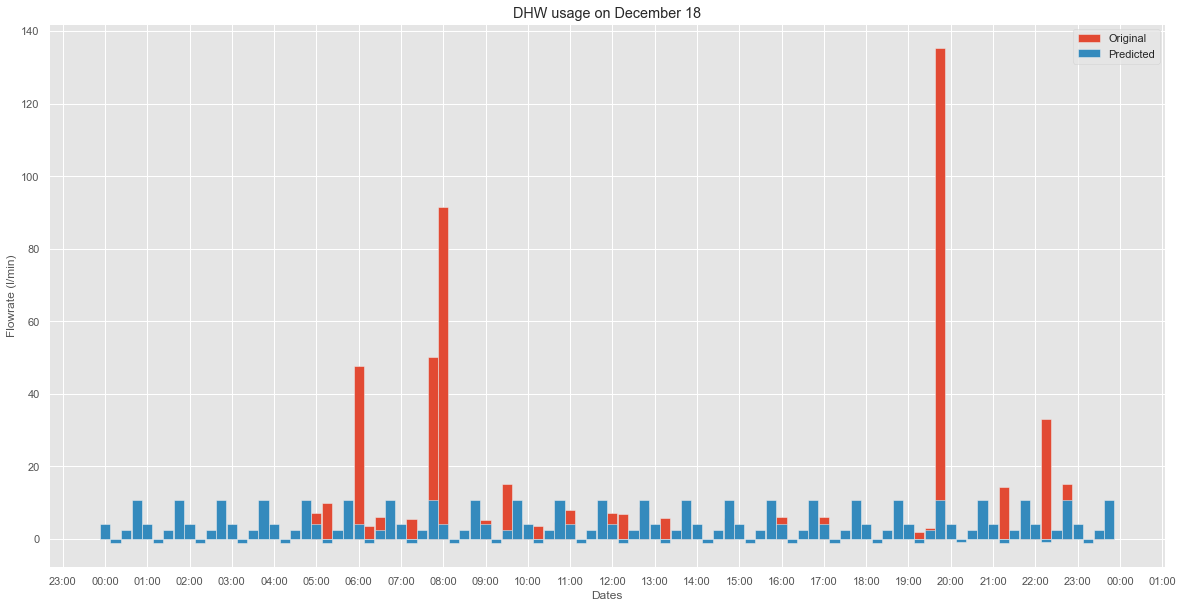

In [25]:
Machine_Df=Machine_Df.loc['20221218':'20221218']
fig = plt.figure()

ax1= fig.add_subplot(111)


plt.bar(Machine_Df.index,Machine_Df["TrueFlow"],width=0.01,label = "Original")
plt.bar(Machine_Df.index,Machine_Df["PredictedFlow"],width=0.01,label = "Predicted")


ax1.xaxis.set_major_locator(md.MinuteLocator(byminute = [0, 120]))
ax1.xaxis.set_major_formatter(md.DateFormatter('%H:%M'))
plt.xlabel('Dates')
plt.ylabel("Flowrate (l/min)")
plt.title("DHW usage on December 18")

plt.legend()